In [1]:
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install torch
%pip install torchvision
%pip install pandas
%pip install imageio
%pip install seaborn
%pip install glob3
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob3 (from versions: none)
ERROR: No matching distribution found for glob3
You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\JahManita\anaconda3\python.exe -m pip install --upgrade pip' command.


## PART 2

In [2]:
import csv
import pandas as pd

file = pd.read_csv('HAM10000_metadata')
show = file.sample(n=10)
show

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
8010,HAM_0005715,ISIC_0034090,nv,histo,65.0,male,back,vidir_modern
9779,HAM_0003146,ISIC_0029563,akiec,histo,85.0,male,upper extremity,rosendahl
9302,HAM_0000666,ISIC_0026122,nv,consensus,0.0,male,foot,vidir_modern
5768,HAM_0000635,ISIC_0028663,nv,follow_up,60.0,female,lower extremity,vidir_molemax
934,HAM_0004258,ISIC_0033693,bkl,consensus,85.0,male,chest,vidir_modern
2568,HAM_0006384,ISIC_0031272,bcc,histo,80.0,male,face,vidir_modern
1714,HAM_0001863,ISIC_0032797,mel,histo,70.0,male,upper extremity,vidir_modern
1926,HAM_0002377,ISIC_0033999,mel,histo,85.0,female,foot,vidir_modern
9059,HAM_0004008,ISIC_0027997,nv,histo,70.0,female,back,rosendahl
9127,HAM_0006114,ISIC_0027873,nv,histo,30.0,female,foot,rosendahl


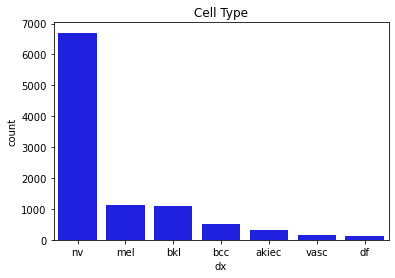

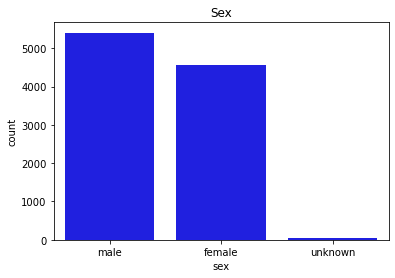

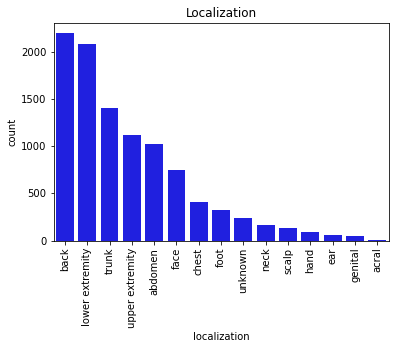

C:\Users\JahManita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


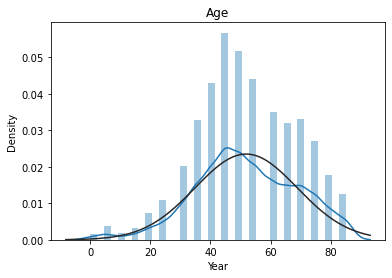

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.countplot(x ='dx', data = file,color='b', order = file['dx'].value_counts().index)
plt.title('Cell Type')
plt.show()
sns.countplot(x ='sex', data = file,color='b', order = file['sex'].value_counts().index)
plt.title('Sex')
plt.show()
sns.countplot(x ='localization', data = file, color='b', order = file['localization'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Localization')
plt.show()
sns.distplot(file.age, fit = norm)
plt.xlabel('Year')
plt.title('Age')
plt.show()

## PART 3

In [4]:
import torch
import shutil 
import os

#create sub-folder by cell_type
real_labels = list(file.dx.unique())
labels_size = len(real_labels)
print(real_labels, labels_size)
for i in labels:
    os.makedirs(os.path.join('Cell_Type',i))

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'] 7


In [5]:
#Separate images by cell-type and copy to sub-folder
import os, shutil
import pandas as pd
data = pd.read_csv('HAM10000_metadata')
for index,line in data.iterrows():
    fromPath = 'images\\' + line['image_id'] + '.jpg'
    #print(fromPath)
    toPath = 'Cell_Type\\' + line['dx'] + '\\' + line['image_id'] + '.jpg'
    #print(toPath)
    shutil.copyfile(fromPath, toPath)
print("Done for separating images by cell-type and copying to sub-folder")

Done for separating images by cell-type and copying to sub-folder


## PART 4

In [6]:
# Median Frequency Balancing
import os
import statistics
  
m = {}
a = []
n = []
directory=os.listdir('Cell_Type')
for each in directory:
    p = os.listdir('Cell_Type\\' + each)
    number_files = len(p)
    n.append(number_files)
    m.update({each:number_files})
median = statistics.median(n)

for key in m:
    k = str(median/m[key])
    a.append(float(k))
    print(key+ ": " + k)  
    
mfb_weight = torch.FloatTensor(a)
mfb_weight

akiec: 1.5718654434250765
bcc: 1.0
bkl: 0.467697907188353
df: 4.469565217391304
mel: 0.4618149146451033
nv: 0.07665920954511558
vasc: 3.619718309859155


tensor([1.5719, 1.0000, 0.4677, 4.4696, 0.4618, 0.0767, 3.6197])

## PART 5

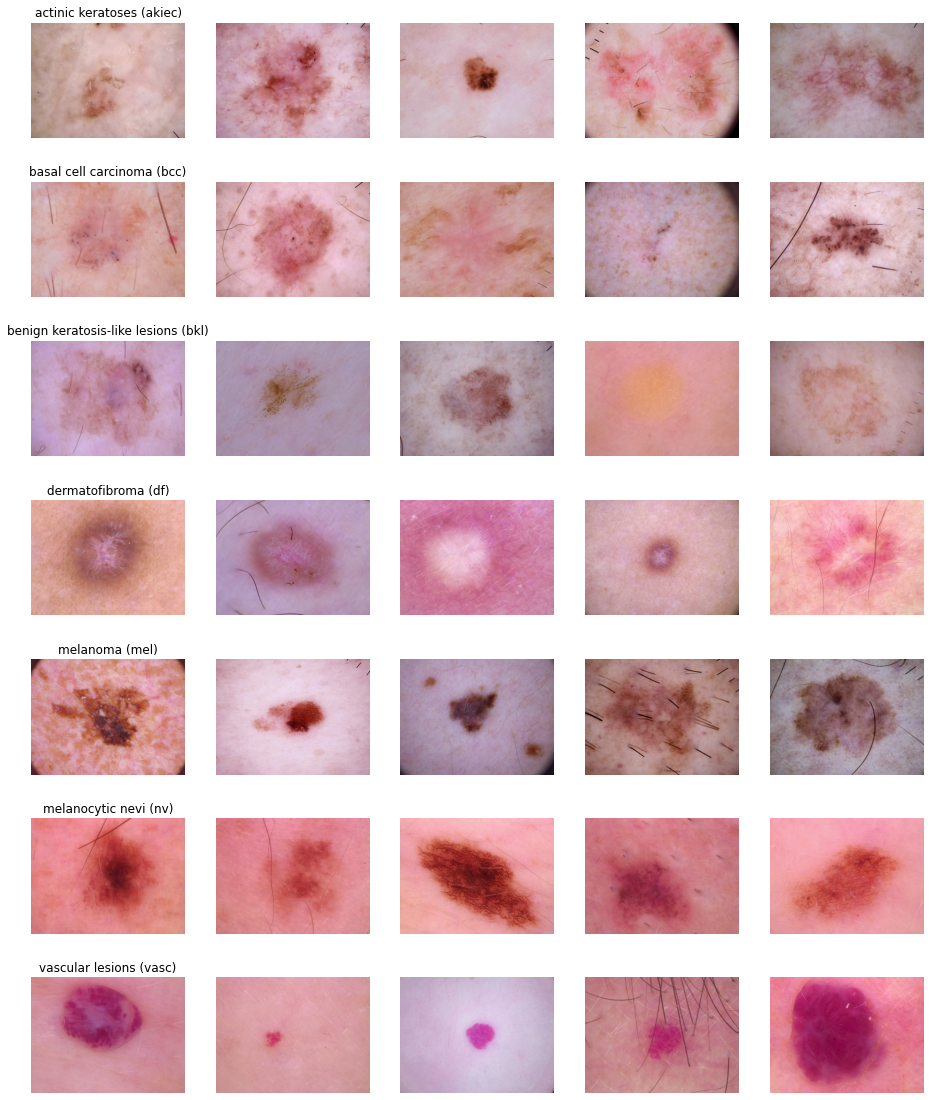

In [7]:
import matplotlib.pyplot as plt
import cv2

#set label
data = pd.read_csv('HAM10000_metadata')
real_labels = list(data.dx.unique())
#print(labels)
#set full name label
full_labels = [ 'actinic keratoses', 'basal cell carcinoma', 'benign keratosis-like lesions', 
           'dermatofibroma','melanoma', 'melanocytic nevi', 'vascular lesions']

f, axarr = plt.subplots(7, 5, figsize=(16,20))
directory=os.listdir('Cell_Type')
row = 0
for each in directory:
    currentFolder = 'Cell_Type//' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        axarr[row,0].set_title(full_labels[row] + " (" + each + ")")
        fullpath = currentFolder + "\\" + file
        img = cv2.imread(fullpath)[:,:,::-1]
        axarr[row,i].set_axis_off()
        axarr[row,i].imshow(img)
    row += 1
plt.show()

## Split data

In [8]:
import torchvision
import numpy as np
from torchvision import transforms, datasets
from sklearn.model_selection import StratifiedShuffleSplit


test = 0.2
validate = 0.2
mfb_weight = torch.FloatTensor(a)
path = os.getcwd() + r"\Cell_Type"
dataset = torchvision.datasets.ImageFolder(root=path)
#set labels to tensor
data_label = [i[1] for i in dataset.samples]
data_label_tensor = torch.FloatTensor(data_label)

#split test
X = torch.randn(data_label_tensor.size(0),2).numpy()
y = data_label_tensor.numpy()
s = StratifiedShuffleSplit(n_splits=1, test_size=test)
s.get_n_splits(X, y)
first_train, test = next(s.split(X, y))

#split validate and final_train
train_label = np.delete(data_label, test, None)
train_label_tensor = torch.FloatTensor(train_label)
X = torch.randn(train_label_tensor.size(0),2).numpy()
y = train_label_tensor.numpy()
ss = StratifiedShuffleSplit(n_splits=1, test_size=validate)
ss.get_n_splits(X, y)
final_train, val = next(ss.split(X, y))

split_data = {'train': final_train, 'validate': val, 'test': test}
print("Train size", len(split_data['train']))
print("Validate size", len(split_data['validate']))
print("Test size", len(split_data['test']))

C:\Users\JahManita\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\JahManita\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


Train size 6409
Validate size 1603
Test size 2003


## Load and transform data 

In [9]:
# Load train/validate/test dataset
import torchvision
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

data_transform1 = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(degrees=30),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
data_transform2 = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

dataset1 = torchvision.datasets.ImageFolder(root=path, transform=data_transform1)
dataset2 = torchvision.datasets.ImageFolder(root=path, transform=data_transform2)

train_dataset = SubsetRandomSampler(split_data['train'])
validation_dataset = SubsetRandomSampler(split_data['validate'])
test_dataset = SubsetRandomSampler(split_data['test'])

train_dataset_loader = DataLoader(dataset1, batch_size= 32, shuffle= False,num_workers= 1, sampler= train_dataset)
validation_dataset_loader = DataLoader(dataset1, batch_size= 32, shuffle= False, num_workers= 1, sampler=validation_dataset)
test_dataset_loader = DataLoader(dataset2, batch_size= 32, shuffle= False, num_workers= 1, sampler=test_dataset)
#print(len(train_dataset_loader))
#print(len(validation_dataset_loader))
#print(len(test_dataset_loader))

## DNN

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, labels_size)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        #x = self.dropout(x)
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        
net = Net()
print(net)
criterion = nn.CrossEntropyLoss(weight = mfb_weight)
#optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=7, bias=True)
)


## Train model

In [11]:
epochs = 20
loss_rate_train = []
loss_rate_val = []

for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    for i, data in enumerate(train_dataset_loader):
        # get the inputs
        inputs, labels = data
        # set the parameter gradients to zero
        optimizer.zero_grad()
        # Forward 
        outputs = net(inputs)
        # Find loss
        loss = criterion(outputs, labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate loss 
        train_loss += loss.item()
        
    train_loss /= len(train_dataset_loader)
    loss_rate_train.append(train_loss)
    
    for i, data in enumerate(validation_dataset_loader):
        # get the inputs
        inputs, labels = data
        # Forward 
        outputs = net(inputs)
        # Find loss
        loss = criterion(outputs, labels)
        # Calculate loss 
        val_loss += loss.item()
        
    val_loss /= len(validation_dataset_loader)
    loss_rate_val.append(val_loss)
        
    print('Epoch: %d Training Loss: %3f Validation Loss: %3f'%(e+1,train_loss,val_loss))

print('Finished Training')

Epoch: 1 Training Loss: 1.609167 Validation Loss: 1.495396
Epoch: 2 Training Loss: 1.467340 Validation Loss: 1.394213
Epoch: 3 Training Loss: 1.414059 Validation Loss: 1.368539
Epoch: 4 Training Loss: 1.372677 Validation Loss: 1.344244
Epoch: 5 Training Loss: 1.339202 Validation Loss: 1.362343
Epoch: 6 Training Loss: 1.277886 Validation Loss: 1.274490
Epoch: 7 Training Loss: 1.239519 Validation Loss: 1.280066
Epoch: 8 Training Loss: 1.212323 Validation Loss: 1.342575
Epoch: 9 Training Loss: 1.217029 Validation Loss: 1.377995
Epoch: 10 Training Loss: 1.200745 Validation Loss: 1.310007
Epoch: 11 Training Loss: 1.143708 Validation Loss: 1.337278
Epoch: 12 Training Loss: 1.075328 Validation Loss: 1.313429
Epoch: 13 Training Loss: 1.078352 Validation Loss: 1.240432
Epoch: 14 Training Loss: 1.059453 Validation Loss: 1.185909
Epoch: 15 Training Loss: 1.046644 Validation Loss: 1.186599
Epoch: 16 Training Loss: 0.982925 Validation Loss: 1.308790
Epoch: 17 Training Loss: 0.943809 Validation Loss

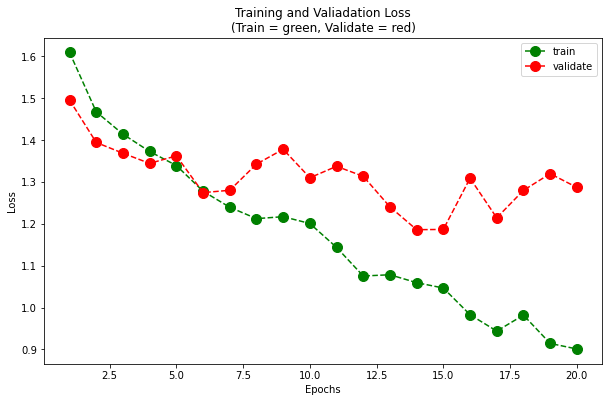

In [9]:
# plot loss graph
plt.figure(figsize=(10,6))
plt.plot(range(1,epochs+1),loss_rate_train, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.plot(range(1,epochs+1),loss_rate_val, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Training and Valiadation Loss\n(Train = green, Validate = red)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validate'], loc='upper right')

## Test model

In [12]:
correct_byclass = {classname: 0 for classname in full_labels}
total_byclass = {classname: 0 for classname in full_labels}
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataset_loader:
        inputs, labels = data
        
        outputs = net(inputs)
       
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_byclass[full_labels[label]] += 1
            total_byclass[full_labels[label]] += 1

accuracy = 100 * float(correct) // total           
print(f'Accuracy of the model on the test images: {accuracy:.1f} %\n')
#print accuracy for each lables
for classname, correct_count in correct_byclass.items():
    accuracy_byclass = 100 * float(correct_count) / total_byclass[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy_byclass:.1f} %')

Accuracy of the model on the test images: 59.0 %

Accuracy for class: actinic keratoses is 81.5 %
Accuracy for class: basal cell carcinoma is 49.5 %
Accuracy for class: benign keratosis-like lesions is 58.2 %
Accuracy for class: dermatofibroma is 87.0 %
Accuracy for class: melanoma is 44.4 %
Accuracy for class: melanocytic nevi is 63.0 %
Accuracy for class: vascular lesions is 0.0 %


## Evaluate model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediceted: tensor([5, 5, 5, 5, 5, 5, 2, 2, 2, 3, 5, 5, 2, 5, 4, 2, 5, 5, 5])
Acutal: tensor([5, 5, 5, 5, 5, 5, 2, 5, 2, 4, 5, 5, 2, 5, 5, 2, 5, 5, 5])
Total test images: 2003


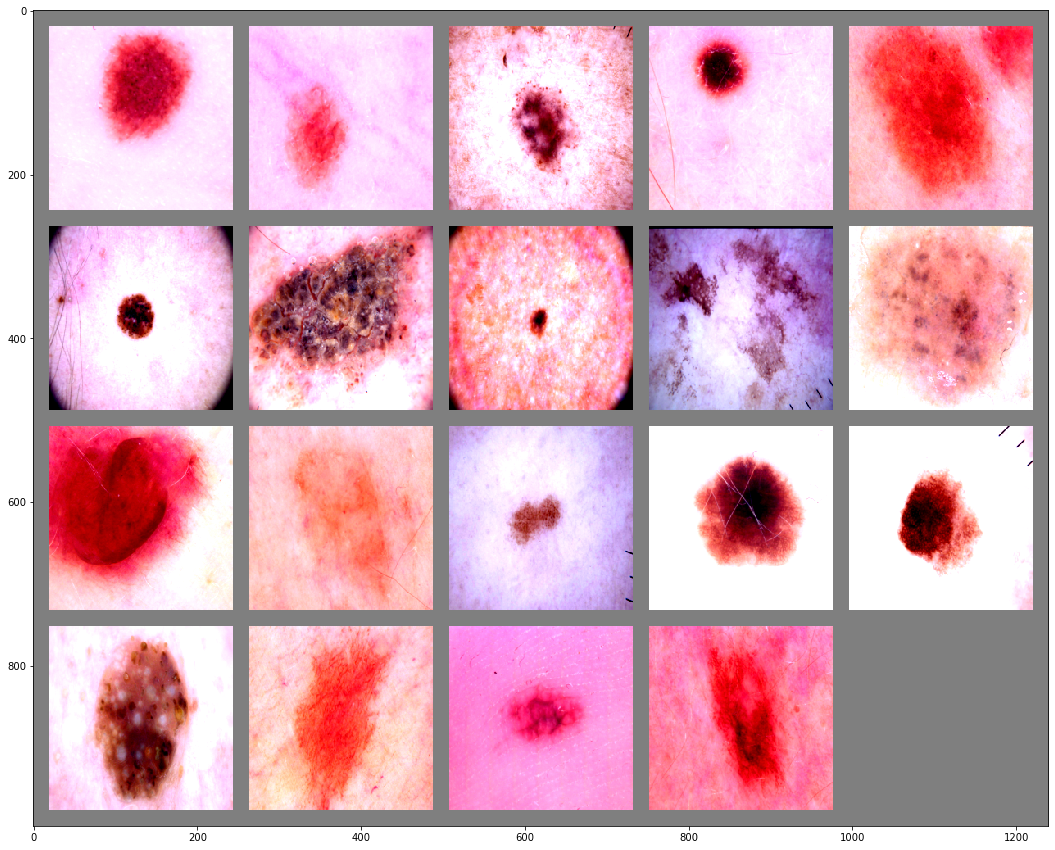

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 15))
test_images = (torchvision.utils.make_grid(inputs, nrow=5, padding=20)) /2 + 0.5
npimages = test_images.numpy()
plt.imshow(np.transpose(npimages, (1, 2, 0)), interpolation='nearest')

print('Prediceted:', predicted)
print('Acutal:' , labels)
print('Total test images:', total)